# Self Organizing Map

* Type of unsupervised deep-learning
* a.k.a. Kohonen Maps
* Dimensionality reduction (3D -> 2D)
* Calculates Euclidean distance between weights for each node to find the best organizing unit for each iteration
  * Radius around that point updates all weights to pull them closer
  * Competing BMU's can pull points equally creating a boundary between the BMU's
* Retain topology of the input set
* Reveal correlations (features) that are not easily identified
* Classify data without supervision (no labels)
* No target vector, so no backpropagation (no error)
* No lateral connections between output nodes
* [Kohonen's Self Organizing Feature Maps](http://www.ai-junkie.com/ann/som/som1.html)

* Random Initialization Trap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import dirname, abspath, join, curdir

np.set_printoptions(precision=3)

In [2]:
# Import the dataset
datapath = join(dirname(dirname(abspath(curdir))), "data", "raw")

dataset = pd.read_csv(join(datapath, "Credit_Card_Applications.csv"))
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
# Split out feature set
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X.shape, y.shape

((690, 15), (690,))

In [4]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)
X_scaled

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [5]:
# Training the SOM
from minisom import MiniSom

som = MiniSom(x=10, 
              y=10, 
              input_len=X_scaled.shape[1],
              sigma=1.0,
              learning_rate=0.5)

som.random_weights_init(X_scaled)
som.train_random(X_scaled, num_iteration=100)

In [6]:
som.distance_map()

array([[0.4402701 , 0.64484967, 0.38210032, 0.22210529, 0.32369457,
        0.3938129 , 0.41561513, 0.50420597, 0.5423083 , 0.31462108],
       [0.5078642 , 0.87508149, 0.73085461, 0.6192001 , 0.61547779,
        0.68522777, 0.7165012 , 0.74965011, 0.94675056, 0.51016792],
       [0.34001738, 0.642706  , 0.75255946, 0.70717036, 0.64142681,
        0.64781006, 0.68570494, 1.        , 0.86136102, 0.57558453],
       [0.30339284, 0.56555414, 0.60335422, 0.48693276, 0.44237074,
        0.5159625 , 0.66420657, 0.65046494, 0.81342104, 0.55064295],
       [0.44445956, 0.58297929, 0.46472965, 0.42980664, 0.45265144,
        0.46627544, 0.63053081, 0.90716266, 0.8661985 , 0.71531242],
       [0.37855941, 0.60975045, 0.58150869, 0.54266604, 0.62337886,
        0.59380811, 0.77237806, 0.97406081, 0.9631796 , 0.51118576],
       [0.28639995, 0.57846959, 0.63174279, 0.68203034, 0.66994891,
        0.79316068, 0.85898242, 0.98554863, 0.74683674, 0.4118317 ],
       [0.25341296, 0.5610792 , 0.6004312

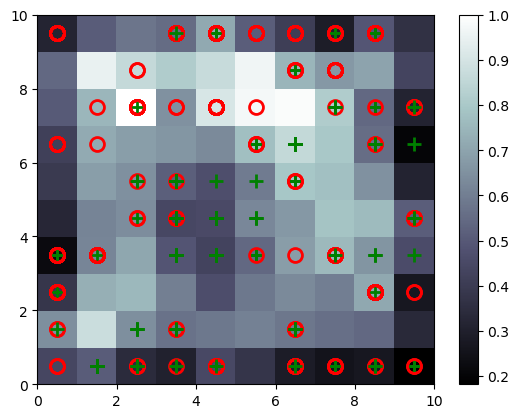

In [7]:
# Visualize the SOM
from pylab import bone, pcolor, colorbar, plot, show

markers = ['o', '+']
colors = ['r', 'g']

bone()
pcolor(som.distance_map().T)
colorbar()

# Label each customer by approval status
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor="None",
         markersize=10,
         markeredgewidth=2)
show()

In [14]:
# Output the potential fraudulent users
mappings = som.win_map(X_scaled)
fraud_pot = np.concatenate((mappings[(2, 7)], mappings[(5, 7)], mappings[(4, 7)]), axis=0)
fraud_pot = sc.inverse_transform(fraud_pot)
fraud_pot.shape

(27, 15)

In [15]:
# Make a supervised deep learning model using the unsupervised data map
customers = dataset.iloc[:, 1:].values

# Create the dependent variable using the list of potential fraudulent customers
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i, 0] in fraud_pot:
        is_fraud[i] = 1

is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
customers_scaled = sc.fit_transform(customers)

In [11]:
# Initialize the ANN
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()

# Add the input layer and the first hidden layer
ann.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=15))

# Add the output layer
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
ann.fit(customers_scaled, is_fraud, batch_size=1, epochs=10)


2023-08-29 09:13:33.909351: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
690/690 [==============================] - 1s 924us/step - loss: 0.4516 - accuracy: 0.9812
Epoch 2/10
690/690 [==============================] - 0s 719us/step - loss: 0.1371 - accuracy: 0.9812
Epoch 3/10
690/690 [==============================] - 1s 761us/step - loss: 0.0823 - accuracy: 0.9812
Epoch 4/10
690/690 [==============================] - 1s 730us/step - loss: 0.0671 - accuracy: 0.9812
Epoch 5/10
690/690 [==============================] - 1s 752us/step - loss: 0.0588 - accuracy: 0.9812
Epoch 6/10
690/690 [==============================] - 0s 707us/step - loss: 0.0540 - accuracy: 0.9812
Epoch 7/10
690/690 [==============================] - 0s 720us/step - loss: 0.0511 - accuracy: 0.9812
Epoch 8/10
690/690 [==============================] - 0s 716us/step - loss: 0.0489 - accuracy: 0.9812
Epoch 9/10
690/690 [==============================] - 0s 706us/step - loss: 0.0474 - accuracy: 0.9812
Epoch 10/10
690/690 [==============================] - 0s 720us/step - loss: 0.045

In [12]:
y_pred = ann.predict(customers_scaled)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1) # axis=1 for horizontal concat
y_pred

22/22 [==============================] - 0s 673us/step


array([[1.57761560e+07, 7.67397403e-04],
       [1.57395480e+07, 3.43225636e-02],
       [1.56628540e+07, 7.46028684e-03],
       ...,
       [1.56754500e+07, 4.82971268e-03],
       [1.57764940e+07, 4.98671131e-03],
       [1.55924120e+07, 2.15659291e-02]])

In [16]:
# Sort the array by predicted probability
y_pred = y_pred[y_pred[:, 1].argsort()]
y_pred

array([[1.57901130e+07, 2.19930803e-06],
       [1.56214230e+07, 2.33480387e-05],
       [1.57997850e+07, 2.72989892e-05],
       ...,
       [1.56679340e+07, 3.17454249e-01],
       [1.56058720e+07, 3.17454249e-01],
       [1.57199400e+07, 3.17454249e-01]])